Excelファイルの非表示列を読み込んだ場合の挙動

■ 問題の概要

Excelでは、列を「非表示」にすることでユーザーの目から一時的に隠すことができます。
しかし、Pythonのpandas.read_excel()を使ってExcelファイルを読み込むと、<font color = "red">非表示列</font>も通常の列と同様に<font color = "red">読み込まれてしまいます。</font>
これは、「非表示」はあくまで表示上の設定であり、データそのものが削除されているわけではないためです。

■ 実際の例（サンプルファイル）

以下のようなExcelファイルを例に考えます：
このファイルでは、列Bと列Dを非表示に設定しています。
B列は通常の非表示、D列はグループ化による非表示です。

**非表示前**

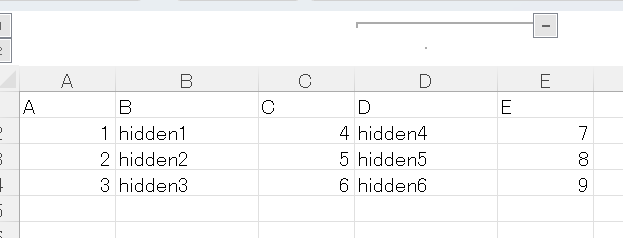

**非表示後**

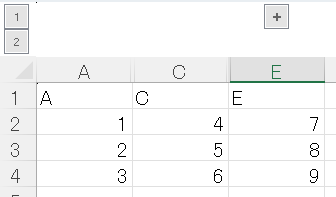

■ Pythonで読み込んだ場合の挙動

このファイルをpythonで単純に読み込んでみます。

In [ ]:
import pandas as pd

df = pd.read_excel("/content/sample_hidden_columns.xlsx")
df.head()


,A,B,C,D,E
0,1,hidden1,4,hidden4,7
1,2,hidden2,5,hidden5,8
2,3,hidden3,6,hidden6,9


 例を出力してみても、確かに,D列が読み込まれてしまっています。

In [ ]:
print(df.columns)

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')


**非表示列が読み込まれることによる具体的な問題点**

---


1. 意図しないデータが処理対象になる

非表示列は、ユーザーが「見せたくない」「使わない」と判断した列であることが多いです。
しかし、Pythonではそれらも通常の列として読み込まれるため、集計・分析・機械学習などの処理に含まれてしまう可能性があります。
例：売上データの平均を計算する際に、非表示の「備考」列（文字列）が含まれてエラーになる。
モデル学習に不要な列が含まれて精度が下がる。そのデータを使うかどうかの確認の手間が生じる。

2. データの可視化やレポートでノイズになる

非表示列が含まれていると、グラフや表の出力が煩雑になり、見づらくなることがあります。
例：matplotlibやseabornで棒グラフを描画した際に、非表示列が意図せずX軸
に表示される。
また、Excelに再出力した際に、ユーザーが非表示にした列が復活してしまう。

3. セキュリティ・プライバシーのリスク

<font color = "red">非表示列に内部メモ</font>が含まれ、それが読み込まれて処理・出力されるリスクがあります。
例：非表示列に非公表データが含まれていることに気が付きにくい。

4. 処理効率の低下

不要な列が多いと、メモリ使用量や処理時間が増加します。特に大規模データでは無視できない問題です。



■ 解決策（非表示列の検出と除外）

openpyxlを使えば、非表示列を検出して除外することが可能です：

In [ ]:
from openpyxl import load_workbook

wb = load_workbook("sample_hidden_columns.xlsx")
ws = wb.active

hidden_columns = [cell.column_letter for cell in ws[1] if ws.column_dimensions[cell.column_letter].hidden]
print("非表示列:", hidden_columns)




非表示列: ['B', 'D']


In [ ]:
# pandasで読み込んだDataFrameから非表示列を除外
df = pd.read_excel("sample_hidden_columns.xlsx")
df_visible = df.drop(columns=hidden_columns)
df_visible

,A,C,E
0,1,4,7
1,2,5,8
2,3,6,9


pandas.read_excel()は非表示列も読み込むため注意が必要です。
非表示列を除外したい場合は、openpyxlで列の表示状態を確認し、明示的に除外する処理を加える必要があります。